# Machine Learning on PGA Tour - Statistical Data Exploration

In this notebook we will try to get an overview of the data using visualization and statistical methods before we proceed to the machine learning models.

In [1]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("../data/pga_data.csv")
df

,Name,Ranking,Driving Distance,Driving Accuracy,Club Head Speed,Ball Speed,Spin Rate,Eligible
0,Patrick Cantlay,1,301.7,60.28,116.03,174.53,2397.4,1.0
1,Jon Rahm,2,307.7,63.52,118.23,177.44,2348.7,1.0
2,Kevin Na,3,288.1,66.73,112.39,164.79,2805.7,1.0
3,Justin Thomas,4,302.7,55.68,117.08,176.24,2281.8,1.0
4,Viktor Hovland,5,300.5,62.47,116.50,173.60,2389.4,1.0
...,...,...,...,...,...,...,...,...
120,C.T. Pan,121,296.3,61.03,111.20,167.34,2129.2,-1.0
121,Matt Kuchar,122,288.0,65.81,108.60,162.18,2419.4,-1.0
122,Brice Garnett,123,288.1,70.86,109.53,164.71,2539.5,-1.0
123,Scott Stallings,124,298.2,58.83,115.96,173.80,2516.0,-1.0


Let's first look at the differences of the features between the two classes.

In [3]:
df["Driving Distance"][0:30].mean(), df["Driving Distance"][30:].mean()

(302.5533333333333, 297.44842105263155)

In [4]:
df["Driving Accuracy"][0:30].mean(), df["Driving Accuracy"][30:].mean()

(61.40466666666668, 61.1357894736842)

In [5]:
df["Club Head Speed"][0:30].mean(), df["Club Head Speed"][30:].mean()

(117.15, 115.02536842105265)

In [6]:
df["Ball Speed"][0:30].mean(), df["Ball Speed"][30:].mean()

(174.57333333333332, 171.33147368421052)

In [7]:
df["Spin Rate"][0:30].mean(), df["Spin Rate"][30:].mean()

(2488.116666666667, 2542.860638297873)

Kernel Density Estimations:

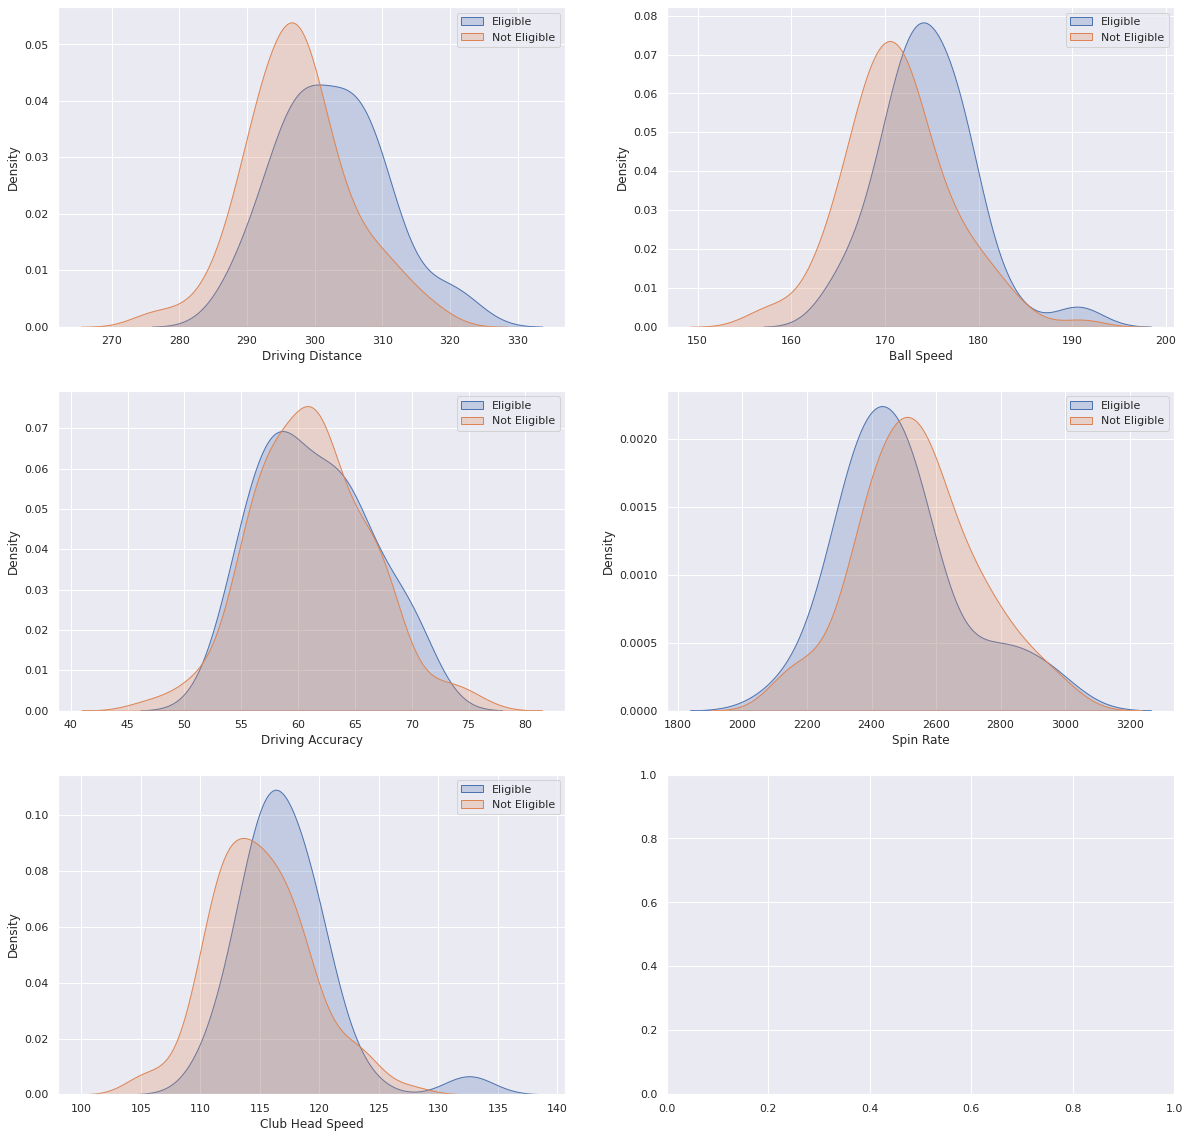

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
i = 0
j = 0
for label in ["Driving Distance", "Driving Accuracy", "Club Head Speed", "Ball Speed", "Spin Rate"]:
    sns.kdeplot(df[label][:30], ax=axes[i, j], shade=True, label="Eligible")
    sns.kdeplot(df[label][30:], ax=axes[i, j], shade=True, label="Not Eligible")
    axes[i, j].legend()
    if i == 2:
        j += 1
        i = 0
    else:
        i += 1

Linear Dependencies of the Features:

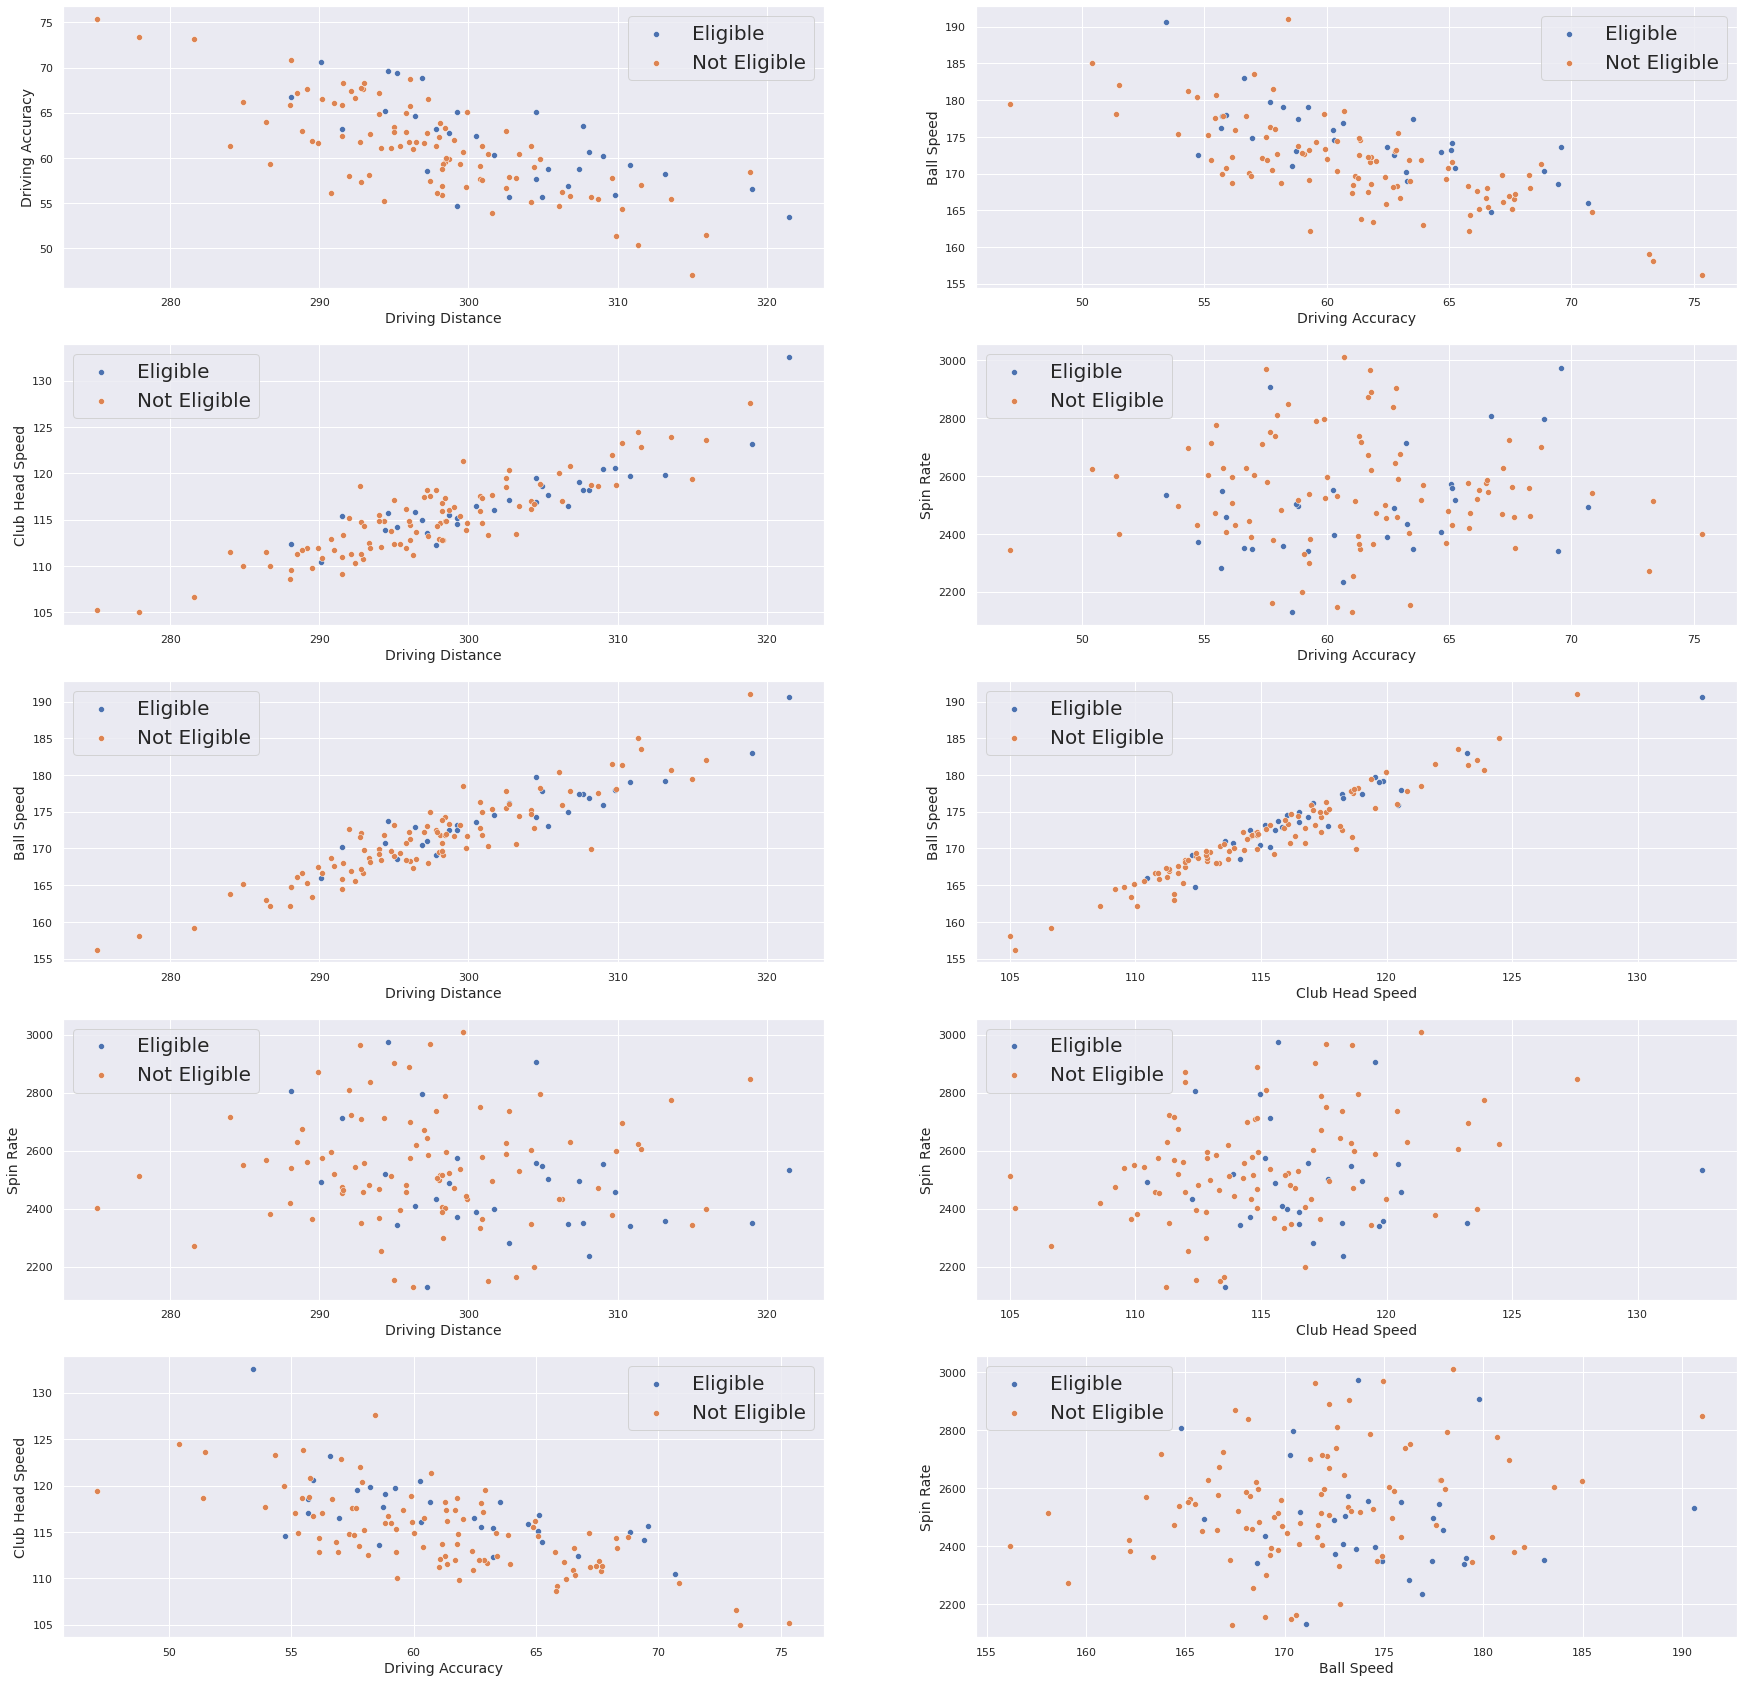

In [13]:
import itertools

columns = df.columns[2:7]
i = 0
j = 0

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
plt.rcParams['axes.labelsize'] = 14

for pair in itertools.combinations(columns, 2):
    sns.scatterplot(x=df[pair[0]][:30], y=df[pair[1]][:30], ax=axes[i, j], label="Eligible")
    sns.scatterplot(x=df[pair[0]][30:], y=df[pair[1]][30:], ax=axes[i, j], label="Not Eligible")
    axes[i, j].legend(prop={'size': 20})
    if i == 4:
        j += 1
        i = 0
    else:
        i += 1

    

There seems to be a lot of multicollinearity between the features. However, as we are not interested in individual feature parameter estimates, this shouldn't be a problem.